<h2>Projeto Final - Pós-graduação MIT em Data Science, Data Analytics & Machine Learning</h2>



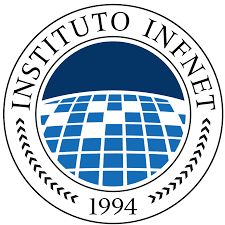

<h1>É possível prever o volume de vendas de lojas do Walmart baseado no histórico de vendas?</h1>



## Sumário
* [Introdução: Descrição do problema](#introduction)
* [Configuração](#setup)
* [Metodologia](#methodology)
* [Análise](#analysis)
* [Resultados e discussões](#results)
* [Conclusão](#conclusion)

## Introdução: <a name="introduction"></a>

A previsão de vendas é uma estimativa de quanto será vendido por uma empresa num determinado período de tempo. Assim, a contribuição da previsão de vendas no processo do planejamento corporativo é amplamente necessário e reconhecido.

Quantas empresas desejariam saber o quanto irá vender no dia seguinte?
Essa resposta facilita a vida das empresas em muitos aspectos, tais como:
- Melhor controle de estoque;
- Qual a quantidade de colaboradores necessárias em épocas de sazonalidade?;
- Previsão de receita;
- Previsão de custos e muitos outros.

*"É preciso haver um norte para que a administração da produção possa trabalhar. A previsão de vendas oferece este direcionamento" (Peinaldo, 2007).*



## Configuração<a name="setup"></a>

Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

## Lendo os dados

O objeto de estudo desse trabalho será a série temporal que compreende os dados de venda semanais do Walmart ao longo de vários anos, os quais foram disponibilizados no site Kaggle, disponível no seguinte link:


[Walmart Recruiting - Store Sales Forecasting
Use historical markdown data to predict store sales](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/naokityokoyama/infnet/main/train.csv')

##Verificando se há informações nulas

In [ ]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

## Visão geral dos dados

Descrição dos Dados

In [ ]:
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Tamanho da base de dados

In [ ]:
df.shape

(421570, 5)

Detalhes sobre os dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


## Pré-processamento dos dados

Convertendo para o formato Date-time

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

Confirmando se os dados foram convertidos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


## Visualização dos Dados

Visualizando a série completa

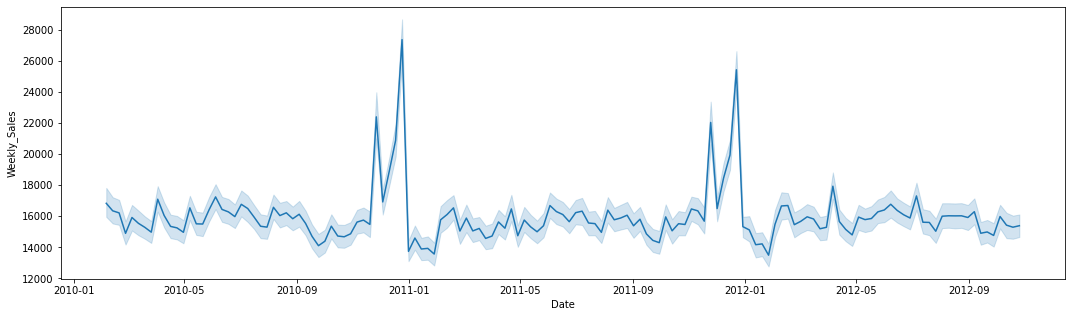

In [ ]:
plt.figure(figsize=(18,5))
sns.lineplot(data=df, x='Date', y='Weekly_Sales')

Verificando vendas negativas

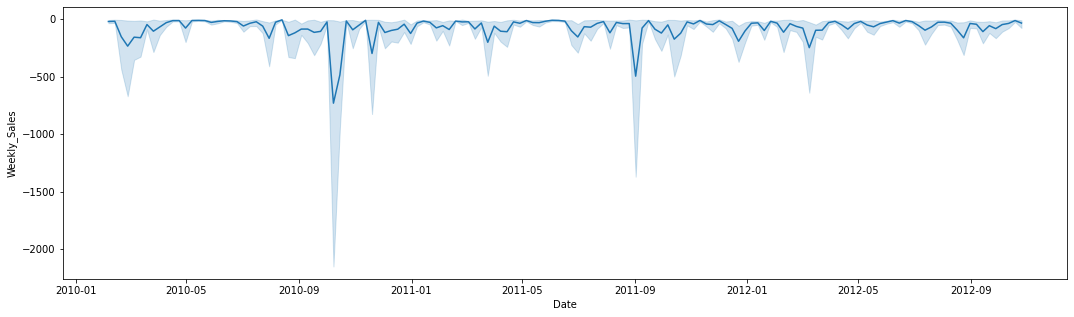

In [ ]:
sales_neg = df.loc[df['Weekly_Sales']<0]
plt.figure(figsize=(18,5))
sns.lineplot(data=sales_neg, x='Date', y='Weekly_Sales')

#Analizando as vendas negativas

In [ ]:
sales_neg.shape[0]

1285

In [ ]:
round (sales_neg.shape[0] / df.shape[0] ,4)*100

0.3

In [ ]:
df.shape[0]

421570

In [ ]:
sales_neg

,Store,Dept,Date,Weekly_Sales,IsHoliday
846,1,6,2012-08-10,-139.65,False
2384,1,18,2012-05-04,-1.27,False
6048,1,47,2010-02-19,-863.00,False
6049,1,47,2010-03-12,-698.00,False
6051,1,47,2010-10-08,-58.00,False
...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True
419598,45,80,2010-02-19,-0.27,False
419603,45,80,2010-04-16,-1.61,False
419614,45,80,2010-07-02,-0.27,False


Venda mínima por departamento

In [ ]:
df.groupby('Dept').min()

,Store,Date,Weekly_Sales,IsHoliday
Dept,,,,
1,1,2010-02-05,711.11,False
2,1,2010-02-05,5453.18,False
3,1,2010-02-05,2.00,False
4,1,2010-02-05,4695.19,False
5,1,2010-02-05,-0.04,False
...,...,...,...,...
95,1,2010-02-05,11158.06,False
96,1,2010-02-05,-63.80,False
97,1,2010-02-05,-9.92,False


#Criando uma lista com as vendas mínimas por departamento

In [ ]:
lista = []
for i in range(1,100):
  lista.append (df[df.Dept==i]['Weekly_Sales'].min())

In [ ]:
df_dp_min = pd.DataFrame(lista)

Departamentos que não existem : 15
53
57
61
62
63
64
66
68
69
70
73
75
76
84
86
88
89



In [ ]:
lista_dp = []
lista_dep_vazios = [15, 53, 57, 61, 62, 63, 64, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89]
for dep in lista_dep_vazios:
  lista_dp.append(df[df.Dept==dep])

In [ ]:
lista_dp

[Empty DataFrame
 Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
 Index: [], Empty DataFrame
 Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
 Index: [], Empty DataFrame
 Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
 Index: [], Empty DataFrame
 Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
 Index: [], Empty DataFrame
 Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
 Index: [], Empty DataFrame
 Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
 Index: [], Empty DataFrame
 Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
 Index: [], Empty DataFrame
 Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
 Index: [], Empty DataFrame
 Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
 Index: [], Empty DataFrame
 Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
 Index: [], Empty DataFrame
 Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
 Index: [], Empty DataFrame
 Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
 Index: [], Emp

Departamentos Vazios : pulou linhas

In [ ]:
df[df.Dept==1]['Weekly_Sales'].describe()

count      6435.000000
mean      19213.485088
std       15102.373853
min         711.110000
25%       10423.465000
50%       15314.910000
75%       23135.595000
max      172225.550000
Name: Weekly_Sales, dtype: float64

In [ ]:
df[df.Dept==1].describe()

,Store,Dept,Weekly_Sales
count,6435.000000,6435.0,6435.000000
mean,23.000000,1.0,19213.485088
std,12.988182,0.0,15102.373853
min,1.000000,1.0,711.110000
25%,12.000000,1.0,10423.465000
50%,23.000000,1.0,15314.910000
75%,34.000000,1.0,23135.595000
max,45.000000,1.0,172225.550000


#Criando uma lista de lojas

In [ ]:
lista_lojas = []
for loja in range(1,46):
  lista_lojas.append(df.loc[df['Store']==loja].shape[0])

In [ ]:
df.loc[df['Store']==1]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
10239,1,99,2012-08-31,20.06,False
10240,1,99,2012-09-07,0.05,True
10241,1,99,2012-09-14,0.03,False
10242,1,99,2012-10-05,635.00,False


In [ ]:
df.loc[df['Store']==3]

,Store,Dept,Date,Weekly_Sales,IsHoliday
20482,3,1,2010-02-05,6453.58,False
20483,3,1,2010-02-12,12748.72,True
20484,3,1,2010-02-19,8918.31,False
20485,3,1,2010-02-26,4992.00,False
20486,3,1,2010-03-05,5172.73,False
...,...,...,...,...,...
29513,3,98,2012-06-01,49.50,False
29514,3,98,2012-06-29,94.50,False
29515,3,98,2012-07-06,40.50,False
29516,3,98,2012-07-13,9.00,False


In [ ]:
pd.DataFrame(lista_lojas)

,0
0,10244
1,10238
2,9036
3,10272
4,8999
5,10211
6,9762
7,9895
8,8867
9,10315


In [ ]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


#Visualizando as lojas com maiores vendas

In [ ]:
top_vendas = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].sum()).reset_index()

In [ ]:
top_vendas

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


**<h2>Gráfico 3: Total de vendas por loja</h2>**

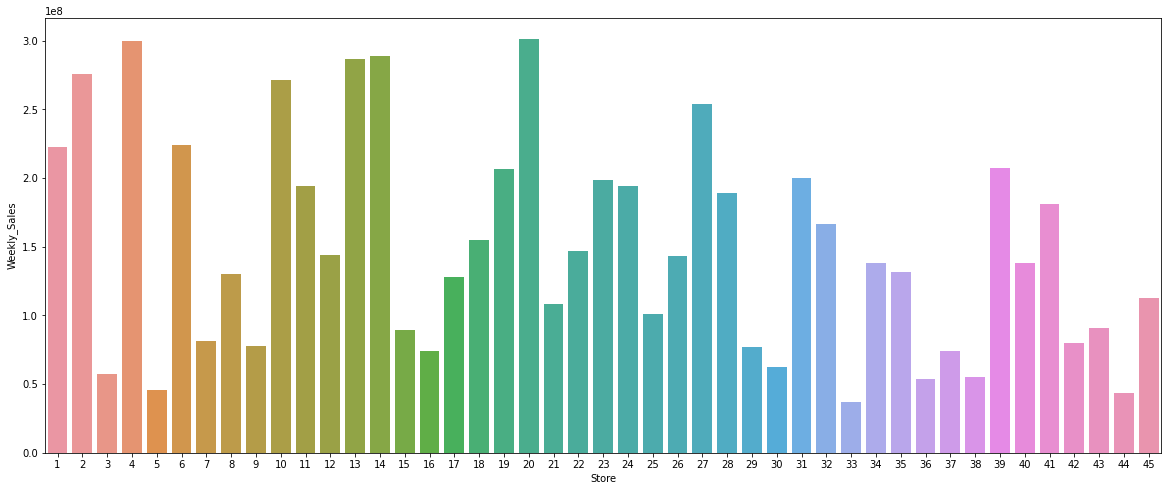

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=top_vendas, x='Store', y='Weekly_Sales')

#**Departamentos com maiores vendas**

In [ ]:
top_dep = pd.DataFrame(df.groupby('Dept')['Weekly_Sales'].sum()).reset_index()

In [ ]:
top_dep

,Dept,Weekly_Sales
0,1,1.236388e+08
1,2,2.806112e+08
2,3,7.589245e+07
3,4,1.671467e+08
4,5,1.356074e+08
...,...,...
76,95,4.493202e+08
77,96,7.383392e+07
78,97,8.949651e+07
79,98,3.982892e+07


**Gráfico 4: Somatório de vendas por departamento**

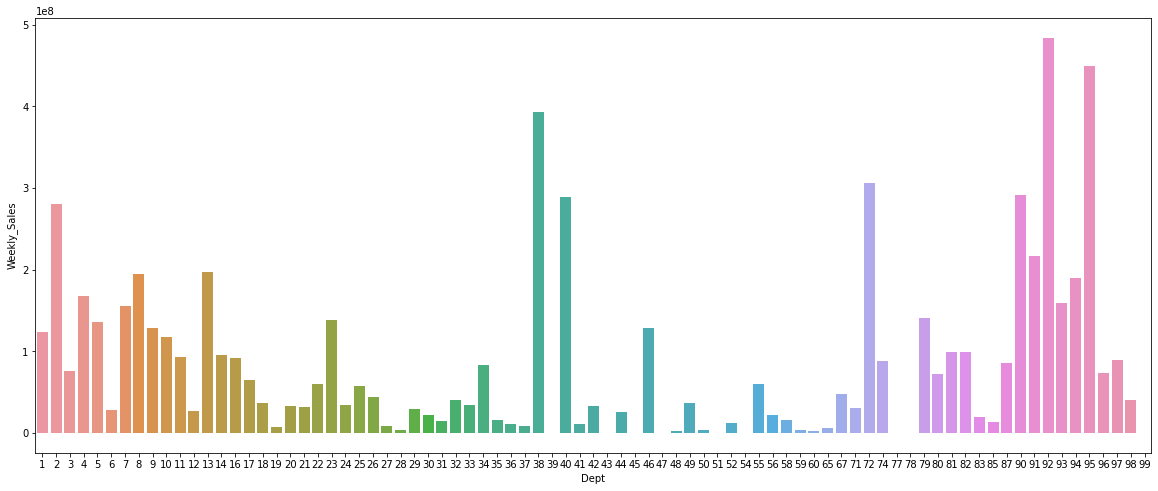

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=top_dep, x='Dept', y='Weekly_Sales')

# Começando a construção do modelo apenas para a Loja 1

In [ ]:
loja_1 = df[df['Store']==1]

In [ ]:
loja_1

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
10239,1,99,2012-08-31,20.06,False
10240,1,99,2012-09-07,0.05,True
10241,1,99,2012-09-14,0.03,False
10242,1,99,2012-10-05,635.00,False


In [ ]:
loja_1['Date'].nunique()

143

Convertendo para Data Frame e agrupando as vendas por data

In [ ]:
loja_1_ = pd.DataFrame(loja_1.groupby('Date')['Weekly_Sales'].sum()).reset_index()
loja_1_

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77


Convertendo para Date Time

In [ ]:
loja_1['Date'] = pd.to_datetime(loja_1['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



FB Prophet

In [ ]:
X = pd.DataFrame(loja_1[['Date', 'Weekly_Sales']])
X = X.rename(columns={'Date':'ds', 'Weekly_Sales':'y'})
X['ds'] = pd.to_datetime(X['ds'])

In [ ]:
l = loja_1_.rename(columns={'Date':'ds', 'Weekly_Sales':'y'})

In [ ]:
l.tail(7)

,ds,y
136,2012-09-14,1517428.87
137,2012-09-21,1506126.06
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77
142,2012-10-26,1493659.74


In [ ]:
m = Prophet(yearly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(l)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=40, freq='w')

In [ ]:
future.tail(10)

,ds
173,2013-05-26
174,2013-06-02
175,2013-06-09
176,2013-06-16
177,2013-06-23
178,2013-06-30
179,2013-07-07
180,2013-07-14
181,2013-07-21
182,2013-07-28


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,1.499445e+06,1.306420e+06,1.696297e+06,1.499445e+06,1.499445e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.499445e+06
1,2010-02-12,1.500233e+06,1.313394e+06,1.695938e+06,1.500233e+06,1.500233e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.500233e+06
2,2010-02-19,1.501022e+06,1.306982e+06,1.698758e+06,1.501022e+06,1.501022e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.501022e+06
3,2010-02-26,1.501810e+06,1.326086e+06,1.693554e+06,1.501810e+06,1.501810e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.501810e+06
4,2010-03-05,1.502599e+06,1.310812e+06,1.705552e+06,1.502599e+06,1.502599e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.502599e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2012-10-29,1.611050e+06,1.411461e+06,1.815189e+06,1.611050e+06,1.611050e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.611050e+06
146,2012-10-30,1.611160e+06,1.410529e+06,1.809677e+06,1.611160e+06,1.611160e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.611160e+06
147,2012-10-31,1.611270e+06,1.422357e+06,1.809026e+06,1.611270e+06,1.611270e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.611270e+06
148,2012-11-01,1.611379e+06,1.420188e+06,1.814008e+06,1.611379e+06,1.611379e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.611379e+06


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-02-05,1.499445e+06,1.300218e+06,1.689339e+06
1,2010-02-12,1.500233e+06,1.305229e+06,1.690802e+06
2,2010-02-19,1.501022e+06,1.312251e+06,1.691718e+06
3,2010-02-26,1.501810e+06,1.313832e+06,1.701023e+06
4,2010-03-05,1.502599e+06,1.318137e+06,1.712832e+06
...,...,...,...,...
190,2013-09-22,1.647051e+06,1.450447e+06,1.845320e+06
191,2013-09-29,1.647820e+06,1.444664e+06,1.844097e+06
192,2013-10-06,1.648588e+06,1.452778e+06,1.850049e+06
193,2013-10-13,1.649356e+06,1.451814e+06,1.847915e+06


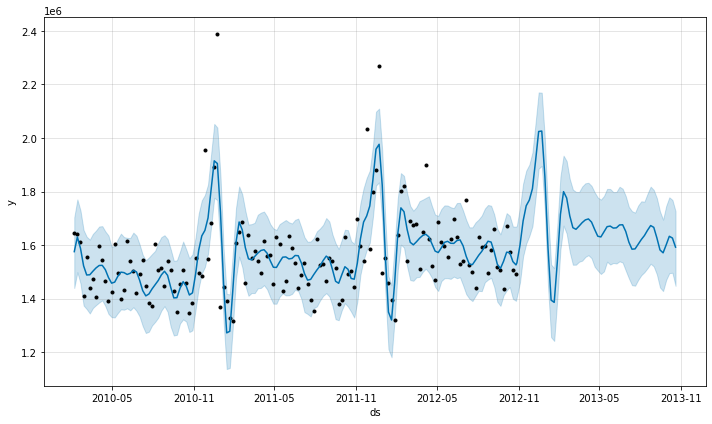

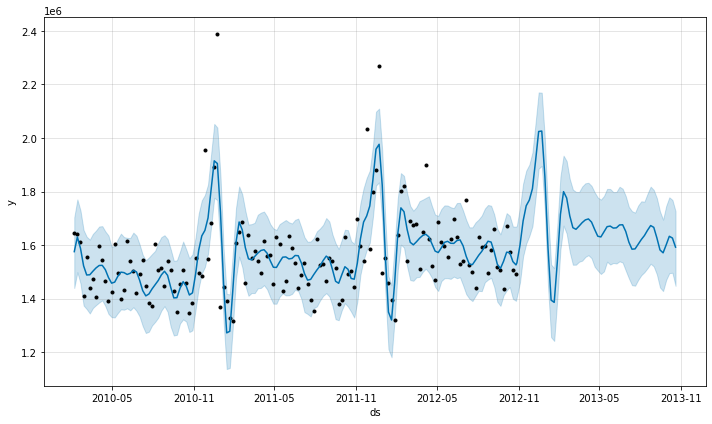

In [ ]:
m.plot(forecast)

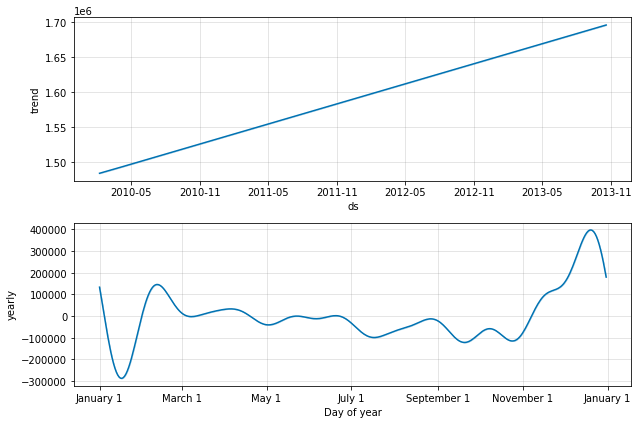

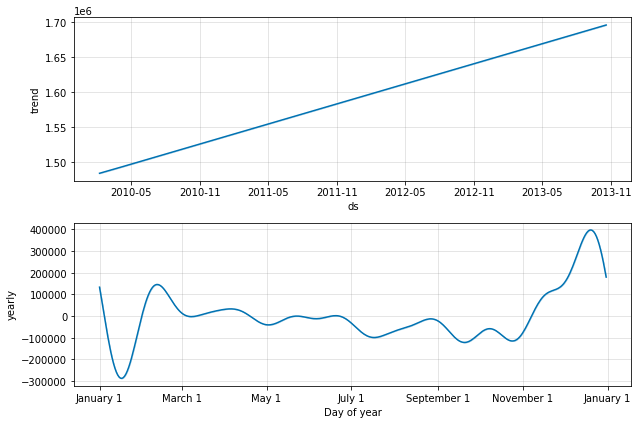

In [ ]:
 m.plot_components(forecast)

In [ ]:
!pip install prophet

     |████████████████████████████████| 71kB 4.8MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 184kB 19.1MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6639040 sha256=33df4ab385ad1d04c81479b18d5670f5e9559c121e355f90f33d64e8b41230c4
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly


In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)


In [ ]:
prophet = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')

In [ ]:
prophet.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [ ]:
m = Prophet()

In [ ]:
m.fit(prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
2990,2016-04-15
2991,2016-04-16
2992,2016-04-17
2993,2016-04-18
2994,2016-04-19


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].shape


(2995, 4)

In [ ]:
prophet.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [ ]:
prophet.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [ ]:
prophet.shape[0]- future.shape[0]

-100

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/naokityokoyama/infnet/main/test.csv')

In [ ]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [ ]:
loja_1.tail(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
10242,1,99,2012-10-05,635.0,False
10243,1,99,2012-10-12,80.0,False
